<a href="https://colab.research.google.com/github/curisuchian/PythonIntegral/blob/main/Copy_of_Convolucion_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Este notebook tiene como objetivo presentar herramientas de convolución de señales



[Breve tutorial para principiantes](https://www.youtube.com/watch?v=8VFYs3Ot_aA)

## Librerías utilizadas


### Numpy

Es una libería de Python que se utiliza principalmente para el cálculo numérico y científico.

Proporciona un objeto de matriz n-dimensional, que es una estructura de datos eficiente para almacenar y manipular grandes conjuntos de datos numéricos.

###Importación de dependencias


Se importan las liberías y se realizan algunas configuraciones previas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8] # define un tamaño predeterminado para las gráficas
plt.rcParams.update({'font.size' : 14})

Una señal es una función que representa una variable o cantidad física que contiene algún tipo de información acerca del comportamiento o naturaleza de un fenómeno

## Tipos de señales

Tiempo continuo:

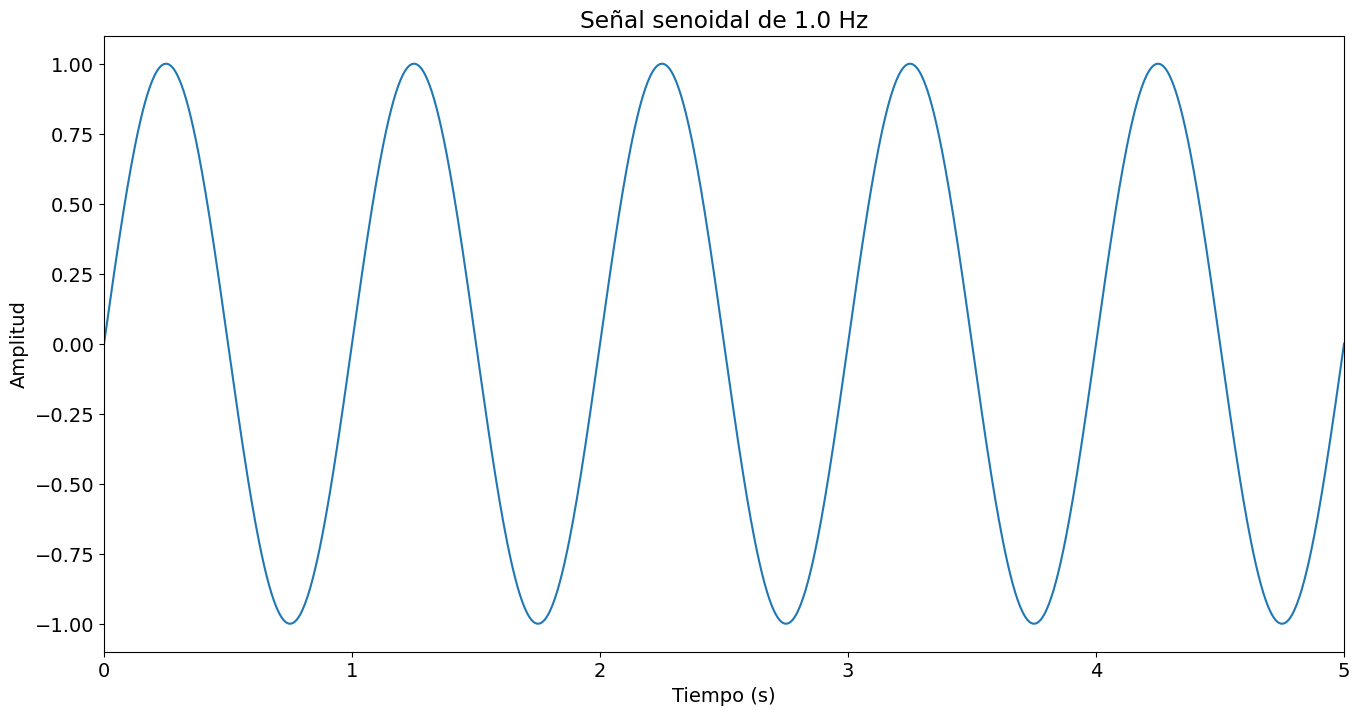

In [ ]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de tiempo de 0 a 5 segundos
t = np.linspace(0, 5, 1000)

# Calcular los valores de la función seno para cada valor de tiempo
x = A * np.sin(2*np.pi*f*t + phi)

# Graficar la señal generada
plt.plot(t, x)
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Señal senoidal de {f} Hz')

plt.xticks(np.arange(0, 6, 1))

plt.show()


Tiempo discreto:

<ipython-input-8-0a28749e367c>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x, use_line_collection=True)


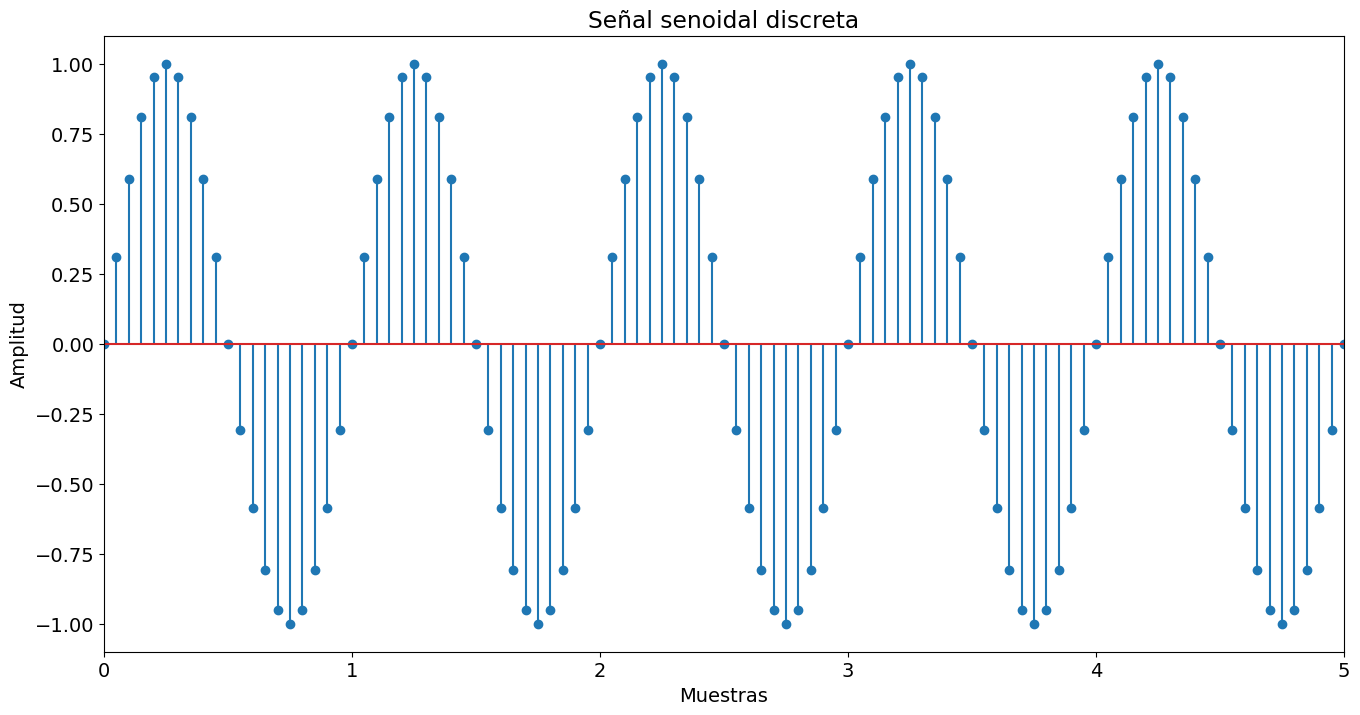

In [8]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de 0 a 5 segundos
n = np.linspace(0, 5, 101)

# Calcular los valores de la función seno para cada valor de tiempo
x = A * np.sin(2*np.pi*f*n + phi)

# Graficar la señal generada
plt.stem(n, x, use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title(f'Señal senoidal discreta')

plt.xticks(np.arange(0, 6, 1))

plt.show()


Además, podemos clasicarlas como:

* Reales y complejas ⟹ $x(t)= x_{1}(t) + jx_{2}(t)$

* Determinísticas ⟹ $x(t)= 2cos(\omega t)$

* Aleatorias ⟹ $x(t)= ?$

Ejemplo de señal aleatoria:

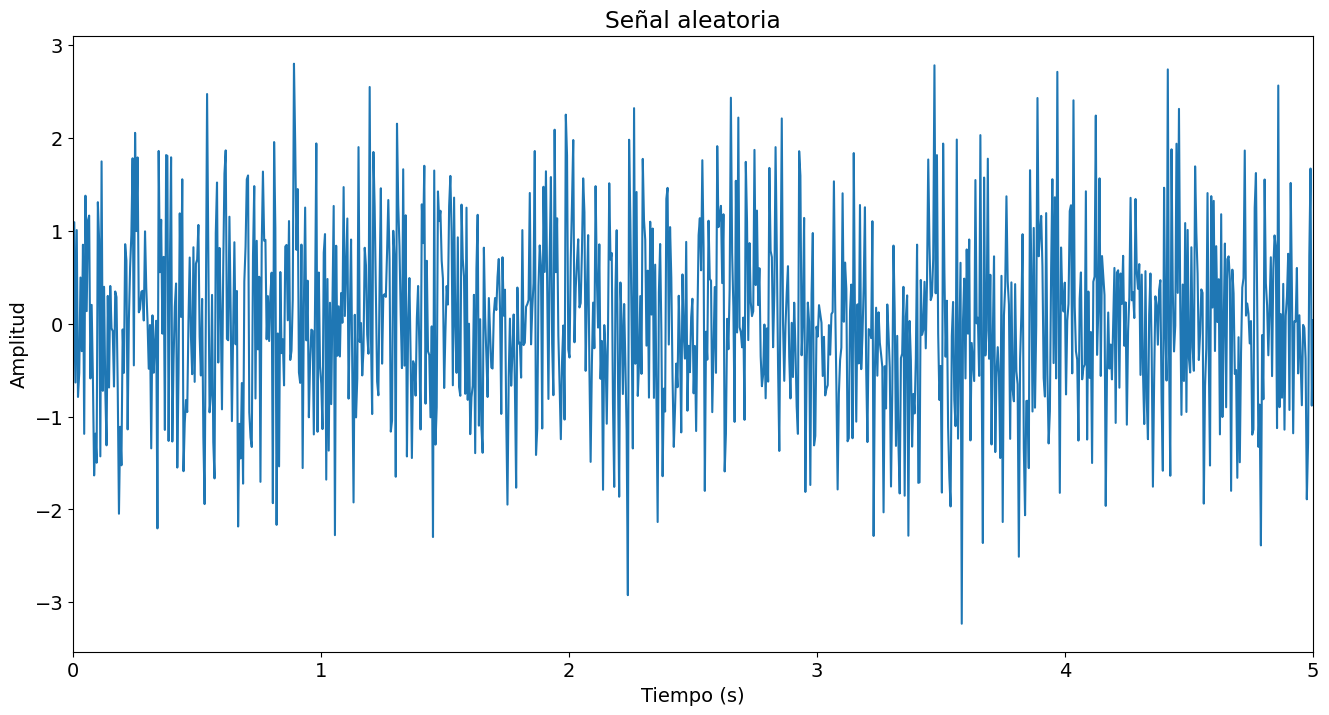

In [ ]:
# Parámetros de la señal
A = 1.0  # amplitud
f = 1.0  # frecuencia
phi = 0  # fase

# Generar una secuencia de valores de tiempo de 0 a 5 segundos
t = np.linspace(0, 5, 1000)

# Calcular los valores de la función seno para cada valor de tiempo
x = np.random.normal(0, 1, len(t))

# Graficar la señal generada
plt.plot(t, x)
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title(f'Señal aleatoria')

plt.xticks(np.arange(0, 6, 1))

plt.show()


## Herramientas

Dichas herramientas nos permiten comprender los fundamentos que subyacen al análisis espectral, sin embargo, en la pŕactica se utiliza la FFT y espectogramas.

Este ejemplo consiste en la construcción de una señal con ruido. Se calcula su espectro frecuencial y se filtra dicho ruido a través de la densidad espectral.

###Creación de las señales

Se crean dos señales de 50 y 200 Hz. Para generar una señal compuesta por ambas.


In [3]:
Ts = 0.001                                       # Se define un tiempo de muestreo
Fs=1/Ts                                          # Se define una frecuencia de muestreo

print(f"Frecuencia de muestreo: {Fs} [Hz]")

Frecuencia de muestreo: 1000.0 [Hz]


In [4]:
w1 = 2*np.pi*50                                  # Se define una frecuencia de 50 Hz para la señal 1
w2 = 2*np.pi*200                                 # Se define una frecuencia de 120 Hz para la señal 2

n = Ts*np.arange(0, 1000)
N = len(n)                                       # N es la cantidad de muestras
x = np.sin(w1*n) + np.sin(w2*n)                  # Se construye la señal compuesta



Luego, a esta última señal se compuesta se agrega ruido.

In [5]:
ruido = 1.0 * np.random.randn(N)           # Se adiciona ruido a la señal compuesta
x_ruido = x + ruido

##Convolución

Se ejecuta la autoconvolución de la señal x...

In [7]:
np.convolve(x, x, mode='full')

array([0.        , 0.        , 1.58778525, ..., 1.93950253, 2.96261051,
       1.58778525])

In [ ]:
freq = Fs*np.arange(0, N)/N                  # Se define el vector de frecuencias

###Espectro de la señal

In [ ]:
L = np.arange(0, np.floor(N/2), dtype='int')    # Para plotear la primera mitad del espectro

In [ ]:
plt.plot(freq[L], mag_X[L])
plt.xlabel('Frecuencia [Hz]', fontsize='14')
plt.ylabel('Magnitud FFT', fontsize='14')
plt.xlim(freq[L[0]],freq[L[-1]])

plt.xticks(np.arange(0, 501, 50))
plt.show()

Explicación de los parámetros utilizados en el método de `specgram()`:
* `x_ruido`: La señal de audio en formato de un array NumPy.
* `Fs`: La tasa de muestreo de la señal de audio en Hz.
* `NFFT`: El número de puntos de la Transformada de Fourier de la señal de audio. A mayor número de puntos, mejor será la resolución en frecuencia, pero menor será la resolución en tiempo.
* `noverlap`: La cantidad de puntos que se superponen entre las ventanas consecutivas de la Transformada de Fourier. A menor cantidad de puntos, mayor será la cantidad de ventanas que se pueden generar y mejor será la resolución en tiempo, pero menor será la resolución en frecuencia.
* `cmap`: El mapa de colores que se utilizará para mostrar el espectrograma.
